In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

# this will allow us to print all the files as we generate more in the kernel
def print_files():
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

# check Trick 91 for an example
def generate_sample_data(): # creates a fake df for testing
    number_or_rows = 20
    num_cols = 7
    cols = list("ABCDEFG")
    df = pd.DataFrame(np.random.randint(1, 20, size = (number_or_rows, num_cols)), columns=cols)
    df.index = pd.util.testing.makeIntIndex(number_or_rows)
    return df

# check Trick 91 for an example
def generate_sample_data_datetime(): # creates a fake df for testing
    number_or_rows = 365*24
    num_cols = 2
    cols = ["sales", "customers"]
    df = pd.DataFrame(np.random.randint(1, 20, size = (number_or_rows, num_cols)), columns=cols)
    df.index = pd.util.testing.makeDateIndex(number_or_rows, freq="H")
    return df

# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print_files()

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


**#tip # 25 prunning decision trees
**

In [2]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
#import data
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df['Sex'] = df['Sex'].map({"male":0, "female":1})
X = df[['Pclass', 'Fare', 'Sex']]
y = df['Survived']

#basic model evaluation
model = DecisionTreeClassifier(random_state=175)
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=175, splitter='best')

In [4]:
score = cross_val_score(model, X, y, scoring='accuracy')

In [5]:
print('Our decision tree with {} nodes has scored {}'.format(model.tree_.node_count, score.mean()))

Our decision tree with 311 nodes has scored 0.8126294645659407


In [6]:
#now prunning our tree and checking val scores; prunning means reducing overfitting. ccp_alpha si the parameter that controls the decision tree complexity, the higher the value
#the harder our prunning, the more nodes we are cutting.
#more details here : https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
model2 = DecisionTreeClassifier(ccp_alpha=0.01, random_state=175)

In [7]:
model2.fit(X, y)
score2 = cross_val_score(model2, X, y, scoring='accuracy')
print('Our decision tree with {} nodes has scored {}'.format(model2.tree_.node_count, score.mean()))

DecisionTreeClassifier(ccp_alpha=0.01, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=175, splitter='best')

Our decision tree with 9 nodes has scored 0.8126294645659407


**Trick 24 : plotting the decision tree with sklearn (new in 0.21 and above)**

In [8]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [10]:
model = DecisionTreeClassifier(ccp_alpha=0.003)
features = ['Pclass', 'Fare', 'Sex']
classes = ['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=666)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.003, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
print(model.tree_.node_count)

21


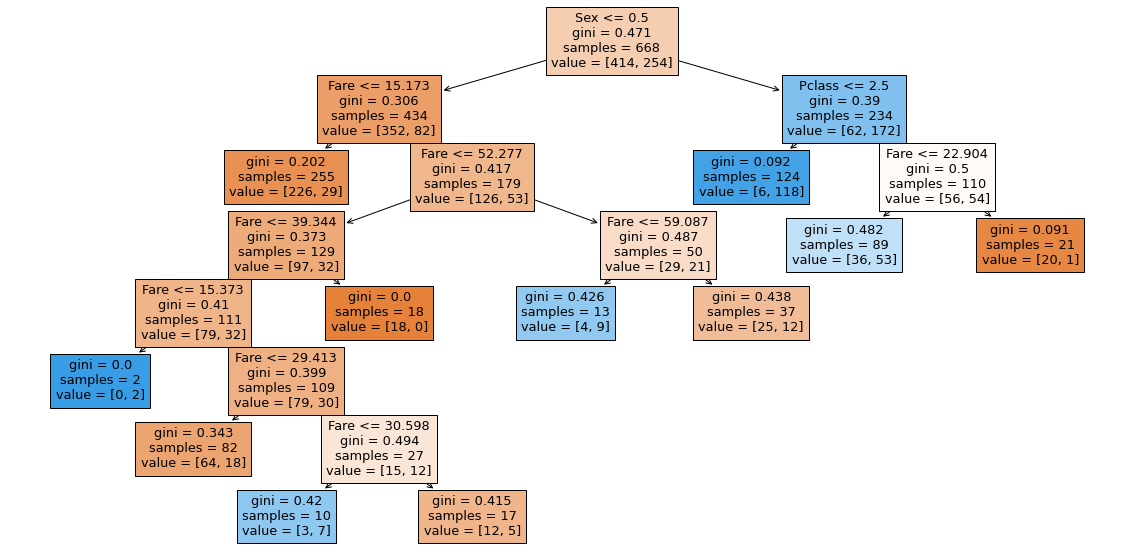

In [12]:
#plotting the tree

plt.figure(figsize = (20, 10))
plot_tree(model, feature_names = features, filled = True);

In [13]:
print(export_text(model, feature_names = features, show_weights = True))

|--- Sex <= 0.50
|   |--- Fare <= 15.17
|   |   |--- weights: [226.00, 29.00] class: 0
|   |--- Fare >  15.17
|   |   |--- Fare <= 52.28
|   |   |   |--- Fare <= 39.34
|   |   |   |   |--- Fare <= 15.37
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Fare >  15.37
|   |   |   |   |   |--- Fare <= 29.41
|   |   |   |   |   |   |--- weights: [64.00, 18.00] class: 0
|   |   |   |   |   |--- Fare >  29.41
|   |   |   |   |   |   |--- Fare <= 30.60
|   |   |   |   |   |   |   |--- weights: [3.00, 7.00] class: 1
|   |   |   |   |   |   |--- Fare >  30.60
|   |   |   |   |   |   |   |--- weights: [12.00, 5.00] class: 0
|   |   |   |--- Fare >  39.34
|   |   |   |   |--- weights: [18.00, 0.00] class: 0
|   |   |--- Fare >  52.28
|   |   |   |--- Fare <= 59.09
|   |   |   |   |--- weights: [4.00, 9.00] class: 1
|   |   |   |--- Fare >  59.09
|   |   |   |   |--- weights: [25.00, 12.00] class: 0
|--- Sex >  0.50
|   |--- Pclass <= 2.50
|   |   |--- weights: [6.00, 11

**Trick 23 : Display intercept & coefficients for a linear model**

In [14]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

dataset = datasets.load_diabetes(return_X_y=False)
X, y = dataset.data, dataset.target
features = dataset.feature_names
linreg = LinearRegression()
linreg.fit(X,y)

linreg.intercept_
linreg.coef_
list(zip(features, linreg.coef_))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

152.1334841628965

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

[('age', -10.012197817470847),
 ('sex', -239.81908936565472),
 ('bmi', 519.8397867901343),
 ('bp', 324.3904276893763),
 ('s1', -792.1841616283061),
 ('s2', 476.74583782366255),
 ('s3', 101.04457032134488),
 ('s4', 177.0641762322512),
 ('s5', 751.2793210873945),
 ('s6', 67.62538639104386)]

**TRICK 22 : Two types of pipelines**

#------------------------------------------------------------
# Two types of ROC Curve

# If the pipeline ends in a classifier or regressor, you use the fit and predict methods
# If the pipeline ends in a transformer you use the fit_transform and transform methods

**TRICK 21 : SEVERAL ROC curves in a single plot (new in sklearn 0.22)**

In [15]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#instantiate
logreg = LogisticRegression()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()


In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [17]:

#import data
df = pd.read_csv('../input/titanic/train.csv')
df.fillna(0)
df['Sex'] = df['Sex'].astype(bool)
#df['Age'] = df['Age'].astype(int)
X = df[['Pclass', 'Fare', 'Sex']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
logreg.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

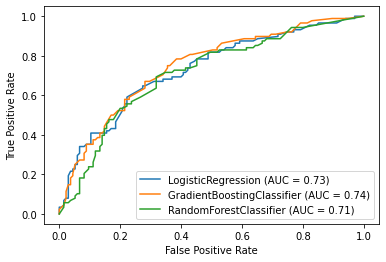

In [19]:
disp = plot_roc_curve(logreg, X_test, y_test)
plot_roc_curve(gbc, X_test, y_test, ax = disp.ax_)
plot_roc_curve(rfc, X_test, y_test, ax = disp.ax_)

**#Trick 20: Plot Confusion matrix (new in sklearn 0.22)**

In [20]:
import sklearn
print(sklearn.__version__)

#------------------------------------------------------------
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

#------------------------------------------------------------
# create our instances
model = LogisticRegression(random_state = 1)

#------------------------------------------------------------
# import data
df = pd.read_csv("/kaggle/input/titanic/train.csv")
X = df[["Pclass", "Fare"]]
y = df["Survived"]

#------------------------------------------------------------
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#------------------------------------------------------------
# fit and predict

model.fit(X_train, y_train)

0.22.2.post1


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The classification confusion matrix


array([[122,  17],
       [ 48,  36]])

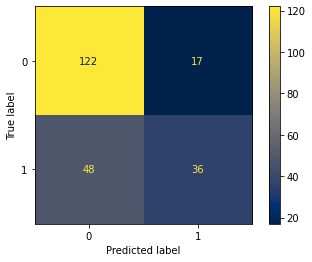

In [21]:
disp = plot_confusion_matrix(model, X_test, y_test, cmap='cividis', values_format=".3g")

print('The classification confusion matrix')
disp.confusion_matrix

**Trick 19 > Most important parameters of a logistic regression**

**Trick 18: Convert your GridSearchCV or RandomizedGridSearch results into a pandas DataFrame**

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [23]:
ohe = OneHotEncoder()
vect = CountVectorizer()
ct = make_column_transformer((ohe,['Sex']), (vect,'Name'))
model = LogisticRegression(solver='liblinear', random_state=666)

In [24]:
df = pd.read_csv('../input/titanic/train.csv')
X = df[['Sex', 'Fare', 'Name']]
y = df['Survived']
pipeline = make_pipeline(ct, model)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
#cross_validate the entire pipeline
print('Notice the score of our entire pipeline >> {}'.format(cross_val_score(pipeline, X, y, cv = 5, scoring='accuracy').mean()))
cross_val_score(pipeline, X, y, cv = 5, scoring = 'accuracy').mean()

Notice the score of our entire pipeline >> 0.8024543343167408


0.8024543343167408

In [27]:
#gridsearch the entire pipeline
params = {"columntransformer__countvectorizer__min_df":[1, 2, 3, 4, 5, 6],
         "logisticregression__C":[0.001, 0.1, 1, 10, 15, 20, 25],
         "logisticregression__penalty":["l1", "l2"]}

grid = GridSearchCV(pipeline, params, cv = 10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                       

In [28]:
results = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
results.sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
7,{'columntransformer__countvectorizer__min_df':...,0.828252,1
9,{'columntransformer__countvectorizer__min_df':...,0.828252,1
11,{'columntransformer__countvectorizer__min_df':...,0.824881,3
13,{'columntransformer__countvectorizer__min_df':...,0.823758,4
4,{'columntransformer__countvectorizer__min_df':...,0.821536,5
...,...,...,...
56,{'columntransformer__countvectorizer__min_df':...,0.616167,79
28,{'columntransformer__countvectorizer__min_df':...,0.616167,79
42,{'columntransformer__countvectorizer__min_df':...,0.616167,79
14,{'columntransformer__countvectorizer__min_df':...,0.616167,79


In [29]:
results.to_csv('results.csv')

**Trick 17 > RandomizedSearchCV**

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.naive_bayes import MultinomialNB
import scipy as sp

In [31]:
vect = CountVectorizer()
model = MultinomialNB()
pipeline = make_pipeline(vect, model)

In [32]:
df = pd.read_csv('../input/titanic/train.csv')
X = df['Name']
y = df['Survived']

#params to optimize
params = {}

params["countvectorizer__min_df"] = [1, 2, 3, 4]
params["countvectorizer__lowercase"] = [True, False]
params["multinomialnb__alpha"] = sp.stats.uniform(scale = 1)

In [33]:
%time
rand = RandomizedSearchCV(pipeline, params, n_iter = 20, cv = 10, scoring = "accuracy", random_state = 666)
rand.fit(X, y)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('countvectorizer',
                                              CountVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.int64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=1.0,
                                                              max_features=None,
                                                              min_df=1,
                                              

In [34]:
print('best score achieved with our search is {}'.format(rand.best_score_))

best score achieved with our search is 0.8102621722846441


In [35]:
print('best params are {}'.format(rand.best_params_))

best params are {'countvectorizer__lowercase': False, 'countvectorizer__min_df': 2, 'multinomialnb__alpha': 0.7744794542685887}


**Trick 16: Crossvalidate and gridsearch a sklearn pipeline**

In [36]:
#------------------------------------------------------------
# import libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression


In [37]:
ohe = OneHotEncoder()
vect = CountVectorizer()
ct = make_column_transformer((ohe, ['Sex']), (vect, 'Name'))
model = LogisticRegression(solver = 'liblinear', random_state = 1)

In [38]:
df = pd.read_csv('../input/titanic/train.csv')
X = df[['Sex', 'Name', 'Fare']]
y = df['Survived']


In [39]:
pipeline = make_pipeline(ct, model)

In [40]:
#------------------------------------------------------------
# cross validate the entire pipeline
print("Notice the score of our entire pipeline is {}".format(cross_val_score(pipeline, X, y, cv = 5, scoring = "accuracy").mean()))
cross_val_score(pipeline, X, y, cv = 5, scoring = "accuracy").mean()

#------------------------------------------------------------
# gridsearch the entire pipeline

# set the parameters
params = {"columntransformer__countvectorizer__min_df":[1, 2],
         "logisticregression__C":[0.1, 1, 10],
         "logisticregression__penalty":["l1", "l2"]}

grid = GridSearchCV(pipeline, params, cv = 5, scoring = "accuracy")
grid.fit(X, y)

# see the best score
print("#-------------------------------------------------------------------------")
print("Best score of the GridSearchCV is ")
grid.best_score_

# see the best params
print("#-------------------------------------------------------------------------")
print("Best parameters of the GridSearchCV are ")
grid.best_params_

Notice the score of our entire pipeline is 0.8024543343167408


0.8024543343167408

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                        

#-------------------------------------------------------------------------
Best score of the GridSearchCV is 


0.8215177954930638

#-------------------------------------------------------------------------
Best parameters of the GridSearchCV are 


{'columntransformer__countvectorizer__min_df': 1,
 'logisticregression__C': 10,
 'logisticregression__penalty': 'l1'}

Trick 15 : OneHotEncoding and How To Use It : 
If you use OneHotEncoder, don't "drop = 'first'":

Multicollinearity is rarely and issue with sklearn models
drop = 'first' is incompatible with handle_unknown = 'ignore'
May cause you problems if yoy standarize all features or use a regularized model

**trick 14 : Handling missing values**

In [41]:
#------------------------------------------------------------
# If you have missing values you can:
# 1. Drop all rows with missing values
# 2. Drop all colmns with missing values
# 3. Impute missing values
# 4. Use a model that handles missing values


In [42]:
#------------------------------------------------------------
# import libraries
from sklearn.experimental import enable_hist_gradient_boosting # this import enables "experimental" packages and clases in sklearn
from sklearn.ensemble import HistGradientBoostingClassifier # this is an experimental package
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, matthews_corrcoef


In [43]:
df = pd.read_csv('../input/titanic/train.csv')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
features = [col for col in df.columns if df[col].dtype != 'object'] #selecting only numerical columns here
features.remove('Survived')
features.remove('PassengerId')

X = df[features]
y = df['Survived']

In [45]:
#traing a model that handles missing values well
model = HistGradientBoostingClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [46]:
model.fit(X_train, y_train)

HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.1,
                               loss='auto', max_bins=255, max_depth=None,
                               max_iter=100, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=None, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False)

In [47]:
y_pred = model.predict(X_test)

In [48]:
matthews_corrcoef(y_test, y_pred)

0.388525247334188

In [49]:
print('Accuracy of our model while having missing value is {}%'.format(round(accuracy_score(y_test, y_pred), 2)*100))

Accuracy of our model while having missing value is 71.0%


****#13 examine each step of a pipeline****

In [72]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

si = SimpleImputer()
model = LogisticRegression()

df = pd.read_csv('../input/titanic/train.csv')
X = df.drop(['Survived','Ticket', 'PassengerId', 'Name', 'Sex', 'Cabin', 'Embarked'], axis=1)

In [73]:
y = df['Survived']

In [74]:
X.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [75]:
#user make_pipeline
pipeline = make_pipeline(si, model)
pipeline.fit(X,y)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [76]:
# let's see the statistics of each step
print("These are the imputed values with the SimpleImputer")
pipeline.named_steps.simpleimputer.statistics_

print("Display the coefficients of the linear model")
pipeline.named_steps.logisticregression.coef_

These are the imputed values with the SimpleImputer


array([ 2.30864198, 29.69911765,  0.52300786,  0.38159371, 32.20420797])

Display the coefficients of the linear model


array([[-0.92077354, -0.03803372, -0.23719669,  0.21345784,  0.00476993]])

In [77]:
#trick 12 : difference between pipeline and make_pipeline
# import libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline

In [78]:
# create each instance
ohe = OneHotEncoder()
si = SimpleImputer()
model = LogisticRegression()

#------------------------------------------------------------
# import data
df = pd.read_csv("/kaggle/input/titanic/train.csv")

#------------------------------------------------------------
# select columns to transform
X = df[["Fare", "Embarked", "Sex", "Age"]].head()
X["Age"].iloc[0] = np.nan # create a missing values
X.head()

y = df[["Survived"]].head()


,Fare,Embarked,Sex,Age
0,7.2500,S,male,NaN
1,71.2833,C,female,38.0
2,7.9250,S,female,26.0
3,53.1000,S,female,35.0
4,8.0500,S,male,35.0


In [80]:
column_transformer = make_column_transformer(
(ohe, ["Embarked", "Sex"]),
(si, ["Age"]),
remainder = "passthrough"
)

pipeline = make_pipeline(column_transformer, model)
pipeline.fit(X,y)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Embarked', 'Sex']),
                                                 ('simpleimputer',
                                                  SimpleImputer(add_indicato...
                                            

In [81]:
#------------------------------------------------------------
# use Pipeline
# The main difference is that we must name each step

column_transformer = ColumnTransformer(
[("encoder", ohe, ["Embarked", "Sex"]), # notice how we must name each step
("imputer", si, ["Age"])],
remainder = "passthrough"
)

pipeline = Pipeline([("preprocessing", column_transformer), ("model", model)]) # notice how we must name each step
pipeline.fit(X, y)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('encoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Embarked', 'Sex']),
                                                 ('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                       

In [84]:
#11 trick KNNImpute
from sklearn.impute import KNNImputer
df = pd.read_csv('../input/titanic/train.csv')
df.isnull().sum()
knni = KNNImputer()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
X = df[["SibSp", "Fare", "Age"]]
nan_index = X[X["Age"].isnull()].index

print("Data with nans")
X[X.index.isin(nan_index)].head(10)

Data with nans


,SibSp,Fare,Age
5,0,8.4583,NaN
17,0,13.0000,NaN
19,0,7.2250,NaN
26,0,7.2250,NaN
28,0,7.8792,NaN
29,0,7.8958,NaN
31,1,146.5208,NaN
32,0,7.7500,NaN
36,0,7.2292,NaN
42,0,7.8958,NaN


In [87]:
print('tranformed with imputer with no nans, values are based on NN')
X_transformed = pd.DataFrame(knni.fit_transform(X), columns= ['SibSp', 'Fare', 'Age'], index= X.index)
X_transformed[X.index.isin(nan_index)].head(10)

tranformed with imputer with no nans, values are based on NN


,SibSp,Fare,Age
5,0.0,8.4583,22.684
17,0.0,13.0000,24.600
19,0.0,7.2250,26.400
26,0.0,7.2250,26.400
28,0.0,7.8792,29.400
29,0.0,7.8958,28.600
31,1.0,146.5208,21.584
32,0.0,7.7500,40.700
36,0.0,7.2292,23.000
42,0.0,7.8958,28.600


# **Trick > Using missing values as a feature**

In [88]:
from sklearn.impute import SimpleImputer
d = {'Age' : [10,20, np.nan,30, 15, 10,40,10, np.nan]}
print('Train Data')
df_train = pd.DataFrame(d)
df_train

Train Data


,Age
0,10.0
1,20.0
2,NaN
3,30.0
4,15.0
5,10.0
6,40.0
7,10.0
8,NaN


In [89]:
"""#------------------------------------------------------------
# Sometimes there is a relathionship between missing values and the target
# We can use this information creating a new features while performing an imputation of a missing values""";

In [90]:
imputer = SimpleImputer()
df_transformed = imputer.fit_transform(df_train)
df_transformed

array([[10.        ],
       [20.        ],
       [19.28571429],
       [30.        ],
       [15.        ],
       [10.        ],
       [40.        ],
       [10.        ],
       [19.28571429]])

In [91]:
print("Notice aditional column with an indicator of 1 next to the previously missing values")
imputerX = SimpleImputer(add_indicator=True)
df_transformed = imputerX.fit_transform(df_train)
df_transformed

Notice aditional column with an indicator of 1 next to the previously missing values


array([[10.        ,  0.        ],
       [20.        ,  0.        ],
       [19.28571429,  1.        ],
       [30.        ,  0.        ],
       [15.        ,  0.        ],
       [10.        ,  0.        ],
       [40.        ,  0.        ],
       [10.        ,  0.        ],
       [19.28571429,  1.        ]])

# №8 Trick Using Make Pipeline in ML project

In [92]:
#------------------------------------------------------------
# import the libraries
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

#------------------------------------------------------------
# create some train and test data

# create a train df
d = {
"feat1":[10, 20, np.nan, 2],
"feat2":[25, 20, 5, 3],
"target":["A", "A", "B", "B"]
}

print("Train data")
df_train = pd.DataFrame(d)
df_train

# create a test df
d = {
"feat1":[30, 5, 15],
"feat2":[12, 10, np.nan]
}

print("Test data")
df_test = pd.DataFrame(d)
df_test

Train data


,feat1,feat2,target
0,10.0,25,A
1,20.0,20,A
2,NaN,5,B
3,2.0,3,B


Test data


,feat1,feat2
0,30,12.0
1,5,10.0
2,15,NaN


In [93]:
#------------------------------------------------------------
# simple ML project step by step

# create each instance
si = SimpleImputer()
model = LogisticRegression()
pipeline = make_pipeline(si, model)

In [94]:
# separate the data between target and features
features = ["feat1", "feat2"]
X_train, y_train = df_train[features], df_train["target"]
X_test = df_test[features]

In [95]:
#------------------------------------------------------------
# use pipeline to fit and predict

# First pipeline will use the SimpleImputer to imputer the missing values
# Then it will train using LogisticRegression
pipeline.fit(X_train, y_train)

# When used pipeline to predict, it will do the same steps as in fit
pipeline.predict(X_test)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

array(['A', 'B', 'A'], dtype=object)

# Trick 7: Handle new data while using OneHotEncoder

In [96]:
# create a train df
d = {
"Categorical":["A", "A", "B", "C"]
}

df_train = pd.DataFrame(d)
df_train

#------------------------------------------------------------
# import the libraries
from sklearn.preprocessing import OneHotEncoder

#------------------------------------------------------------
# transform data during train part

,Categorical
0,A
1,A
2,B
3,C


In [100]:
print('fit_transform when training data')
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
 #if you don' put false you will get a sparse matrix object

X_train = ohe.fit_transform(df_train[['Categorical']])
X_train

fit_transform when training data


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [101]:
d = {
"Categorical":["A", "A", "B", "C", "D"] # new value, D, previously not seen in train
}

df_test = pd.DataFrame(d)
df_test


print("transform using OneHotEncoder. Notice that we have a line with zeros for categorical value of D")
X_test = ohe.transform(df_test[["Categorical"]])
X_test

,Categorical
0,A
1,A
2,B
3,C
4,D


transform using OneHotEncoder. Notice that we have a line with zeros for categorical value of D


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

# Trick 6: Common ways to encode categorical features: OneHotEncoder, OrdinalEncoder

In [102]:
#------------------------------------------------------------
# create a df
d = {
"Shape":["square", "square", "oval", "circle"],
"Class":["third", "first", "second", "third"],
"Size":["S", "S", "L", "XL"]
}

df = pd.DataFrame(d)
df

#------------------------------------------------------------
# import the libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#------------------------------------------------------------
# transform data using OneHotEncoder
print("Transform categorical data using OneHotEncoder")
ohe = OneHotEncoder(sparse = False) # if you don't put false, you will get a sparse matrix object
shaped_transformed = ohe.fit_transform(df[["Shape"]]) # if you pass as a series, you will need to reshape the data. Notice the double square bracket
shaped_transformed

#------------------------------------------------------------
# transform data using OrdinalEncoder
print("Transform categorical data using OrdinalEncoder")
print("When using OrdinalEncoder, your data has to have a order: like first class, second class, third class")
oe = OrdinalEncoder(categories = [["first", "second", "third"], # order for the column Class
                                  ["S", "M", "L", "XL"]]) # order for the column Size
categorical_ordinal_transformed = oe.fit_transform(df[["Class", "Size"]])
categorical_ordinal_transformed

,Shape,Class,Size
0,square,third,S
1,square,first,S
2,oval,second,L
3,circle,third,XL


Transform categorical data using OneHotEncoder


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

Transform categorical data using OrdinalEncoder
When using OrdinalEncoder, your data has to have a order: like first class, second class, third class


array([[2., 0.],
       [0., 0.],
       [1., 2.],
       [2., 3.]])

# Trick 5: Benefits of using sklearn for preprocessing and not pandas

Reasons to use sklearn to ML preprocessing and not pandas:
* You can cross-validate the entire workflow
* You can grid search model & preprocessing hyperparameters
* Avoids adding new columns to the source DataFrame
* pandas lacks separate fit/transform steps to prevent data leakage

# Trick 2: Seven ways to select columns using ColumnsTransformer

In [103]:
#------------------------------------------------------------
# import data
df = pd.read_csv("/kaggle/input/titanic/train.csv")

#------------------------------------------------------------
# select columns to transform
X = df[["Fare", "Embarked", "Sex", "Age"]].head()
X["Age"].iloc[0] = np.nan # create a missing values
X

#------------------------------------------------------------
# import the libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

#------------------------------------------------------------
# instanciate the classes
ohe = OneHotEncoder()

#------------------------------------------------------------
# create the pipeline and select the columns by name

print("Select the column by name")

ct = make_column_transformer(
(ohe, ["Embarked", "Sex"])# if you have null values it will give and error. You must first fill those values before doing an ohe
)

# fit_transform the columns
X_transformed = ct.fit_transform(X) 
X_transformed

#------------------------------------------------------------
# create the pipeline and select the columns by position

print("Select the column by position")

ct = make_column_transformer(
(ohe, [1, 2])# if you have null values it will give and error. You must first fill those values before doing an ohe
)

# fit_transform the columns
X_transformed = ct.fit_transform(X) 
X_transformed

#------------------------------------------------------------
# create the pipeline and select the columns using slice

print("Select the column using slice")

ct = make_column_transformer(
(ohe, slice(1, 3))# if you have null values it will give and error. You must first fill those values before doing an ohe
)

# fit_transform the columns
X_transformed = ct.fit_transform(X) 
X_transformed

#------------------------------------------------------------
# create the pipeline and select the columns using a boolean mask

print("Select the column using a boolean mask")

ct = make_column_transformer(
(ohe, [False, True, True, False])# if you have null values it will give and error. You must first fill those values before doing an ohe
)

# fit_transform the columns
X_transformed = ct.fit_transform(X) 
X_transformed

#------------------------------------------------------------
# create the pipeline and select the columns using make_column_selector and regex

print("Select the column using using make_column_selector and regex. New in pandas 0.22")

ct = make_column_transformer(
(ohe, make_column_selector(pattern = "E|S"))# if you have null values it will give and error. You must first fill those values before doing an ohe
)

# fit_transform the columns
X_transformed = ct.fit_transform(X) 
X_transformed

#------------------------------------------------------------
# create the pipeline and select the columns using make_column_selector and dtype_include

print("Select the column using using make_column_selector and dtype_include. New in pandas 0.22")

ct = make_column_transformer(
(ohe, make_column_selector(dtype_include = object))# if you have null values it will give and error. You must first fill those values before doing an ohe
)

# fit_transform the columns
X_transformed = ct.fit_transform(X) 
X_transformed

#------------------------------------------------------------
# create the pipeline and select the columns using make_column_selector and dtype_exclude

print("Select the column using using make_column_selector and dtype_exclude. New in pandas 0.22")

ct = make_column_transformer(
(ohe, make_column_selector(dtype_exclude = "number"))# if you have null values it will give and error. You must first fill those values before doing an ohe
)

# fit_transform the columns
X_transformed = ct.fit_transform(X) 
X_transformed

,Fare,Embarked,Sex,Age
0,7.2500,S,male,NaN
1,71.2833,C,female,38.0
2,7.9250,S,female,26.0
3,53.1000,S,female,35.0
4,8.0500,S,male,35.0


Select the column by name


array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.]])

Select the column by position


array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.]])

Select the column using slice


array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.]])

Select the column using a boolean mask


array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.]])

Select the column using using make_column_selector and regex. New in pandas 0.22


array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.]])

Select the column using using make_column_selector and dtype_include. New in pandas 0.22


array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.]])

Select the column using using make_column_selector and dtype_exclude. New in pandas 0.22


array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.]])

# Trick 1: Using ColumnTransformer to manipulate different columns

In [ ]:
# import data
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

#------------------------------------------------------------
# select columns to transform
X = df[["Fare", "Embarked", "Sex", "Age"]].head()
X["Age"].iloc[0] = np.nan # create a missing values
X

#------------------------------------------------------------
# import the libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

#------------------------------------------------------------
# instanciate the classes
ohe = OneHotEncoder()
imp = SimpleImputer()

#------------------------------------------------------------
# create the pipeline
ct = make_column_transformer(
(ohe, ["Embarked", "Sex"]), # if you have null values it will give and error. You must first fill those values before doing an ohe
(imp, ["Age"]), 
remainder = "passthrough" # this means that the column Fare will appear the last one.
)

#------------------------------------------------------------
# fit_transform the columns
X_transformed = ct.fit_transform(X) 
X_transformed